# Scenario
You are working as an analyst for a real estate company. Your company wants to build a machine learning model to predict the selling prices of houses based on a variety of features on which the value of the house is evaluated.

# Objective
Your job is to build a model that will predict the price of a house based on features provided in the dataset. Senior management also wants to explore the characteristics of the houses using some business intelligence tools. One of those parameters includes understanding which factors are responsible for higher property value - $650K and above.

# Dataset
The dataset can be accessed here. It consists of information on 22,000 properties. The dataset consists of historic data of houses sold between May 2014 to May 2015.

These are the definitions of data points provided:

Note: For some of the variables are self-explanatory, no definition has been provided.

- Id: Unique identification number for the property
- date: the date the house was sold
- price: the price of the house
- waterfront: the house which has a view to a waterfront
- condition: How good the condition is (Overall). 1 indicates worn-out property and 5 excellent.
- grade: Overall grade given to the housing unit, based on the King County grading system. 1 poor, 13 excellent.
- Sqft_above: square footage of house apart from the basement
- Sqft_living15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotSize area.
- Sqft_lot15: lotSize area in 2015(implies-- some renovations)


# Project Structure
1. Import libraries & Load Dataset
2. Overview of Data
3. Data Cleansing
    - 3-1. Remove Duplicates
    - 3-2. Standardization of Headers
    - 3-3. Handling Null Values
4. Exploratory Data Analysis (EDA)
    - 4-1 Analysis of Numeric Features
    - 4-2. Price decision factors of $650K and above
5. Regression Analysis
    - Data Processing
    - Simple Data modeling (Linear Regression)
    - Outlier removed
    - Feature Engineering
    - Scaling
    - Fealture Selection (Feature Importance, Correlations, Vairance Inflation Factor)
    - Model Training with Selected Features
    - Model Training with Different Algorithms (KNN, Forest etc)

6. Conclusion


# 1. Import libraries & Load Dataset

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler


In [20]:
df = pd.read_excel('/Users/dooinnkim/ironhack_da_may_2023/data_mid_bootcamp_project_regression/regression_data.xls')

# 2. Overview of Data

In [21]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [22]:
df.shape

(21597, 21)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [24]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


- There are 21,597 entries in this dataset (i.e., houses for sale).
- The dataset includes various features such as the number of bedrooms and bathrooms, living area (in square feet), lot size (in square feet), number of floors, whether the house is a waterfront property, view quality, condition and grade of the house, above ground living area (in square feet), basement area (in square feet), the year the house was built and renovated, zip code, latitude, longitude, the living area in 2015 (in square feet), the lot size in 2015 (in square feet), and the house price.

### Some specific interpretations:

- **ID**: The mean of this value is not meaningful because it's just a unique identifier. The min and max tell us the range of these identifiers.

- **Bedrooms**: The average house has around 3.37 bedrooms, but the number can vary greatly, with a standard deviation of about 0.93. The minimum number of bedrooms is 1, and the maximum is 33.

- **Bathrooms**: Houses have on average 2.12 bathrooms with a standard deviation of 0.77. The minimum number of bathrooms is 0.5 (likely a toilet and sink but no shower or tub), while the maximum is 8.

- **Sqft_living**: The average living space is about 2,080 square feet, with a standard deviation of 918. The smallest house has 370 square feet, while the largest has 13,540 square feet.

- **Sqft_lot**: The average lot size is 15,099 square feet (roughly a third of an acre), but the size varies greatly (standard deviation is 41,412) with the largest lot being 1,651,359 square feet (almost 38 acres).

- **Floors**: The average number of floors in a house is approximately 1.49, and houses in the dataset have between 1 and 3.5 floors.

- **Waterfront**: The mean of this feature is close to 0, suggesting that most houses are not on the waterfront.

- **Price**: House prices average around $540,296, with a standard deviation of $367,368. The cheapest house costs $78,000,  while the most expensive one is  $7,700,000.

In [25]:
df.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [26]:
df.duplicated().sum()

0

# 3. Data Cleaning



In [27]:
from uszipcode import SearchEngine

# Initialize search engine
search = SearchEngine()

# Function to get state by zipcode
def get_state_by_zip(zipcode):
    zipcode_info = search.by_zipcode(zipcode)
    if zipcode_info:
        return zipcode_info.state

# Function to get district by zipcode
def get_district_by_zip(zipcode):
    zipcode_info = search.by_zipcode(zipcode)
    if zipcode_info:
        return zipcode_info.major_city


# Create a new 'District' column in df
df['district'] = df['zipcode'].apply(get_district_by_zip)


/opt/anaconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [28]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,district
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,Seattle
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,Seattle
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,Kenmore
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,Seattle
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,Sammamish


# 4. EDA (Exploratory Data Analysis)

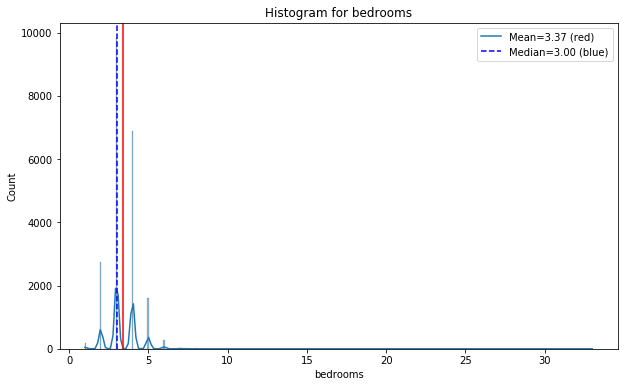

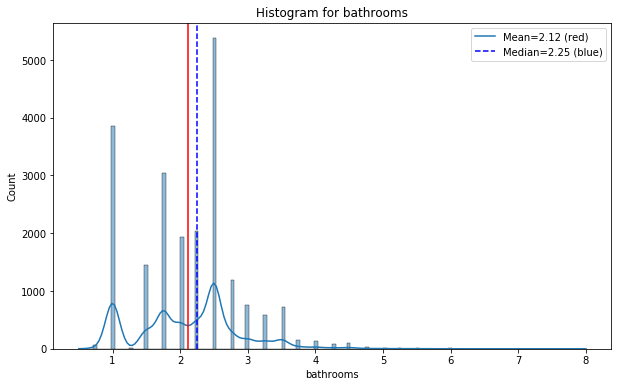

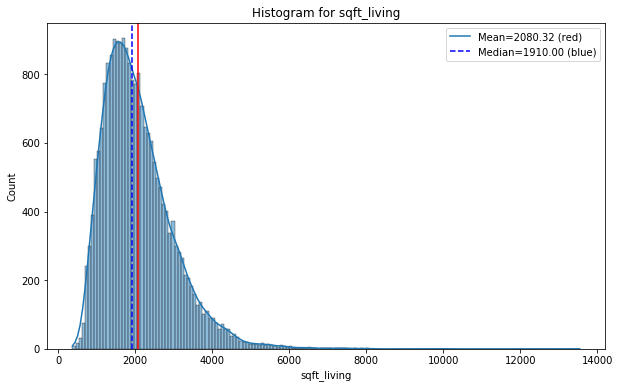

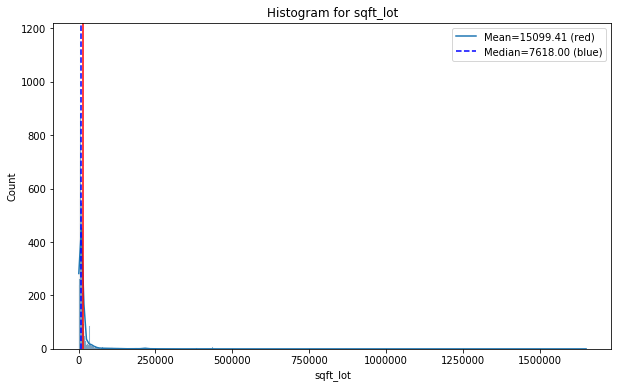

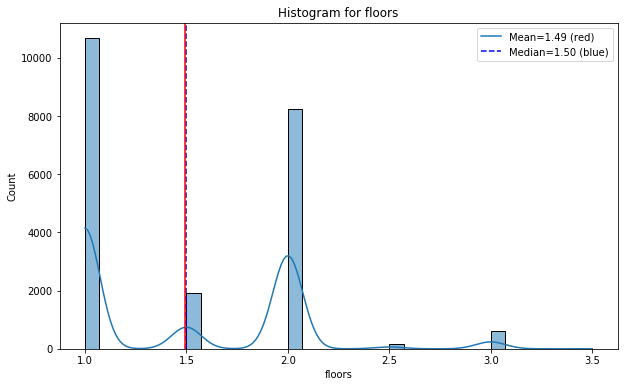

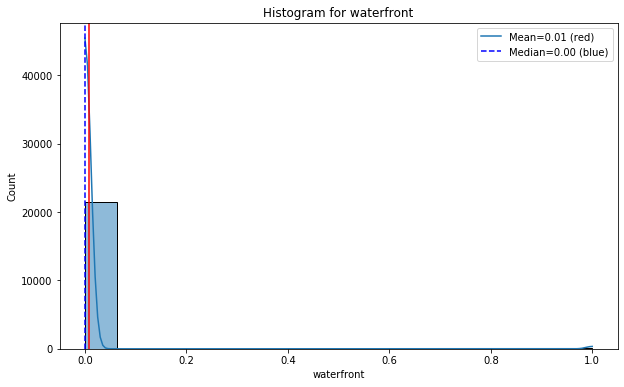

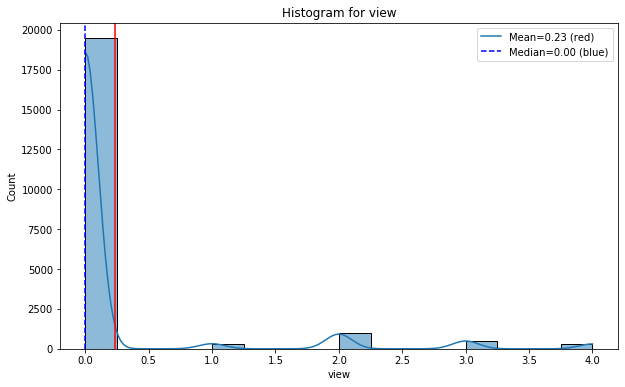

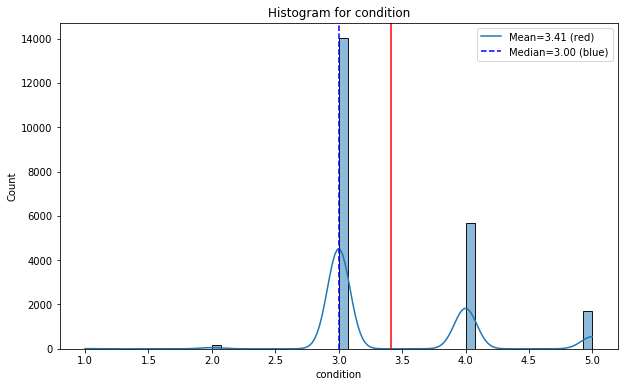

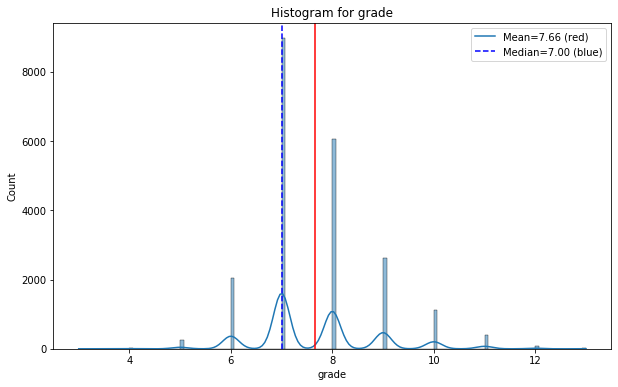

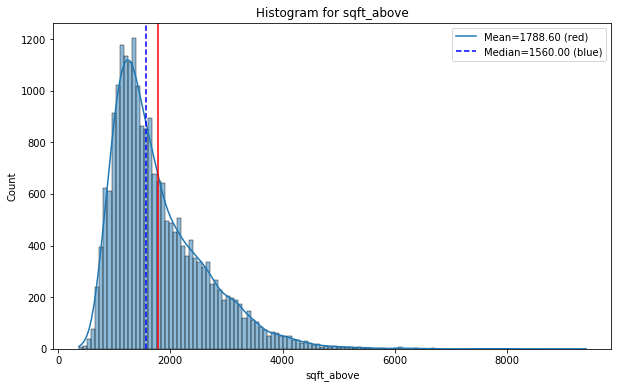

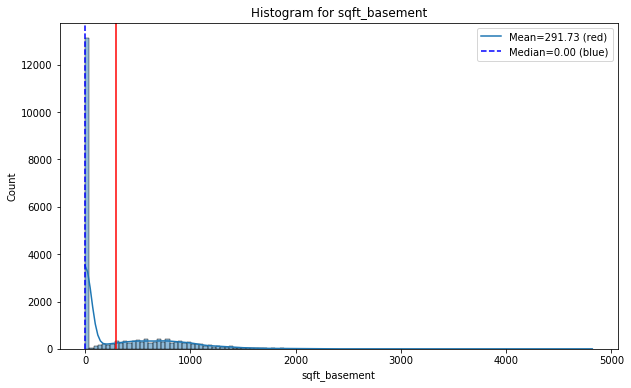

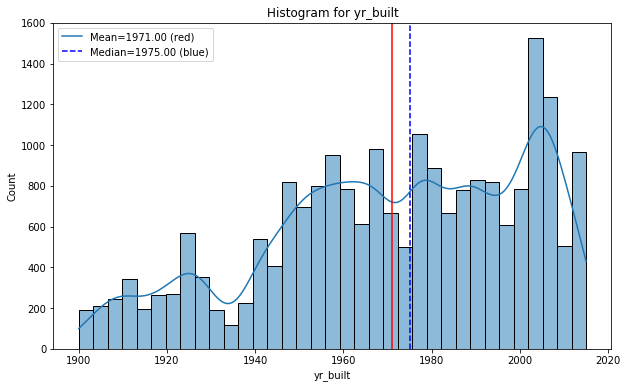

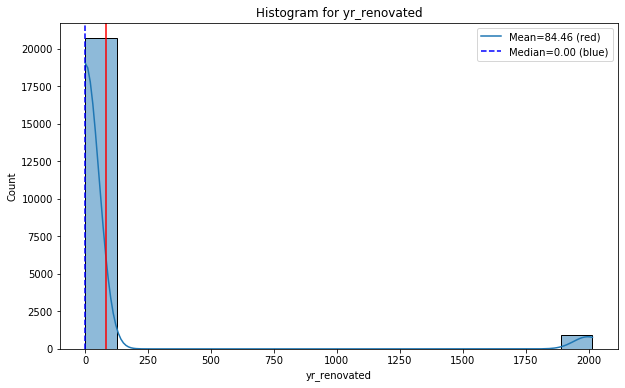

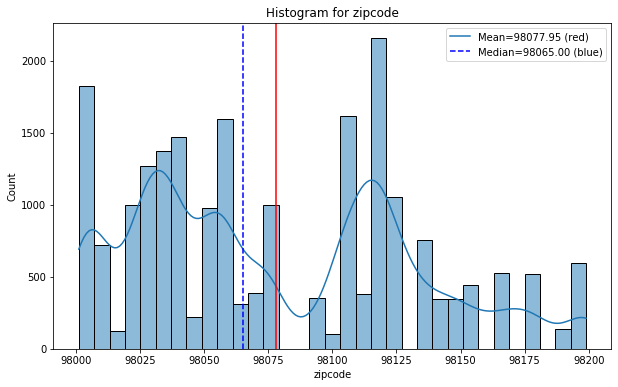

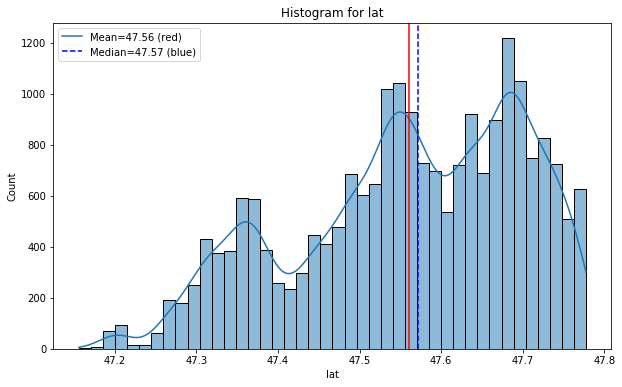

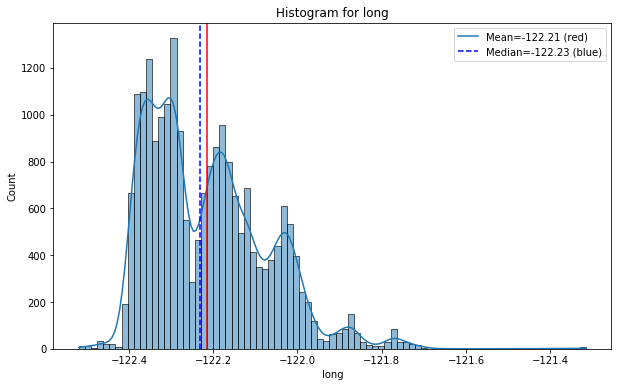

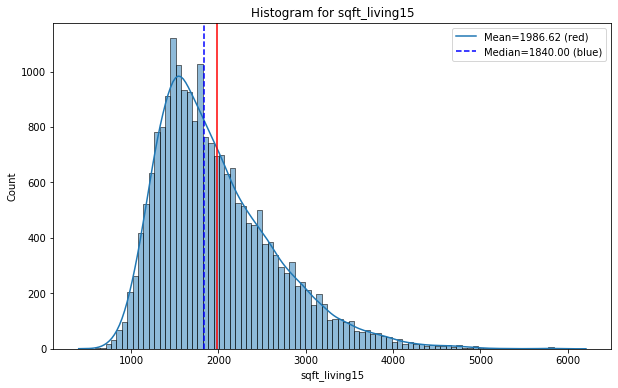

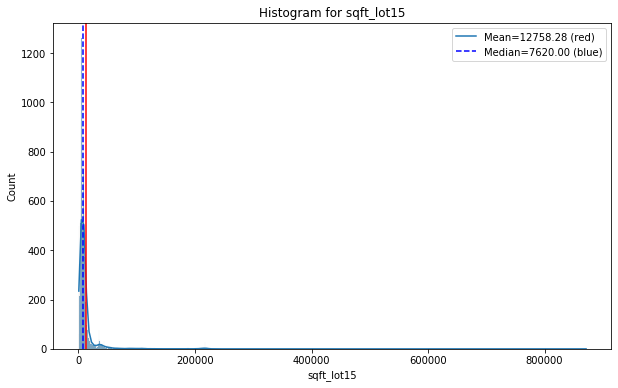

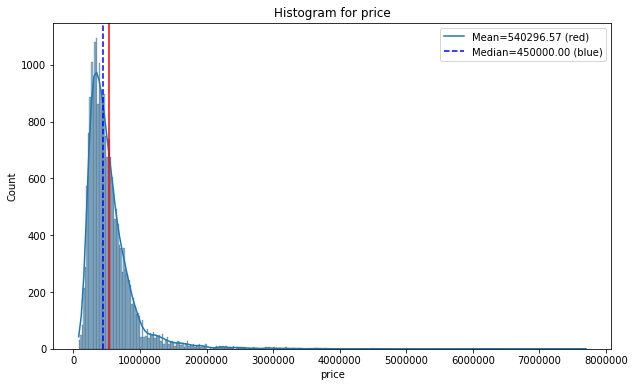

In [29]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df_numerical = df.select_dtypes(include=['int64','float64'])

for col in df_numerical.columns[1:]:
    plt.figure(figsize=(10,6))

    sns.histplot(df_numerical[col], kde=True)

    mean_value = df_numerical[col].mean()
    median_value = df_numerical[col].median()

    plt.axvline(median_value, color='b', linestyle='--')
    plt.axvline(mean_value, color='r', linestyle='-')

    plt.legend({f'Mean={mean_value:.2f} (red)':mean_value, f'Median={median_value:.2f} (blue)':median_value})

    plt.title(f'Histogram for {col}')

    plt.show()

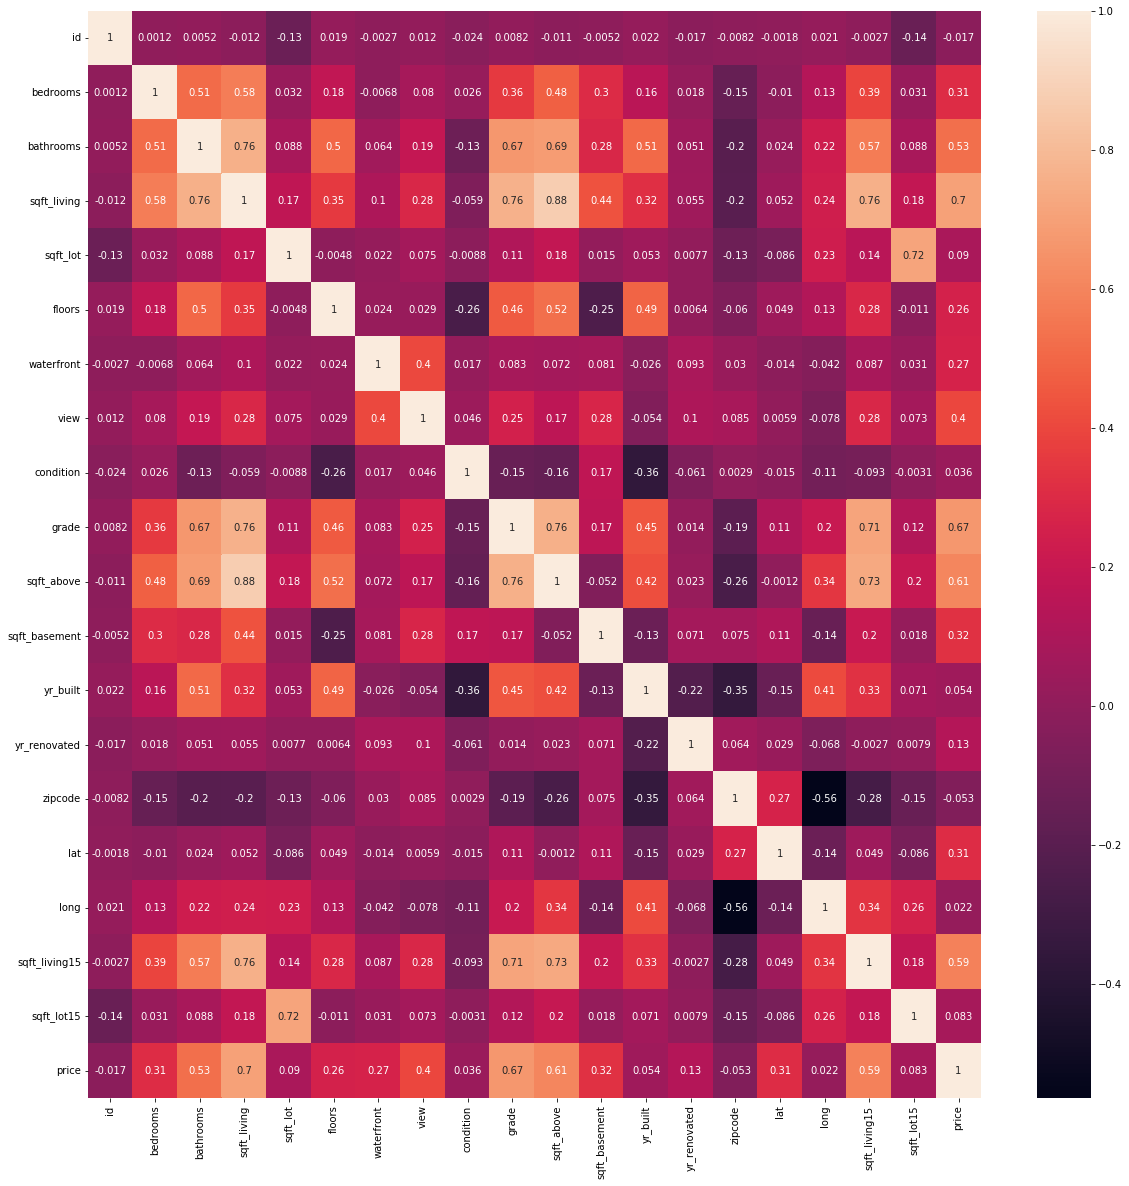

In [30]:
corr_matrix=df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

- **sqft_living** has a high positive correlation with **price (0.701917)**, meaning that houses with more living space tend to be more expensive. This variable also has strong correlations with **bathrooms (0.755758)**, **grade (0.762779)**, and **sqft_above (0.876448)**, suggesting that larger houses tend to have more bathrooms, higher grades, and more above ground space.

- **grade** and **sqft_above** also have significant positive correlations with **price (0.667951 and 0.605368 respectively)**, suggesting that the quality of the house and the above ground space are important factors in determining the price of a house.


- **floors** and **condition** have a moderate negative correlation (-0.264075), implying that houses with more floors tend not to be in as good condition, or vice versa.

In [31]:
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

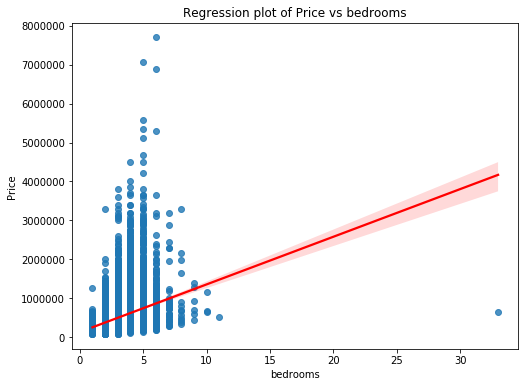

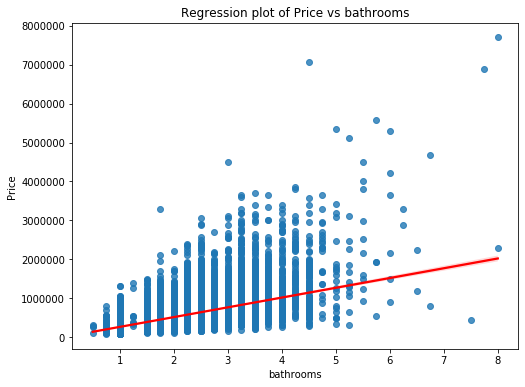

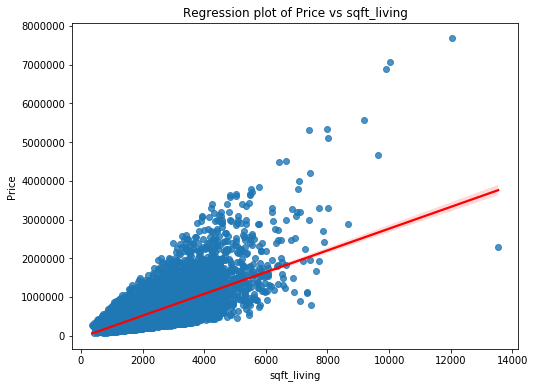

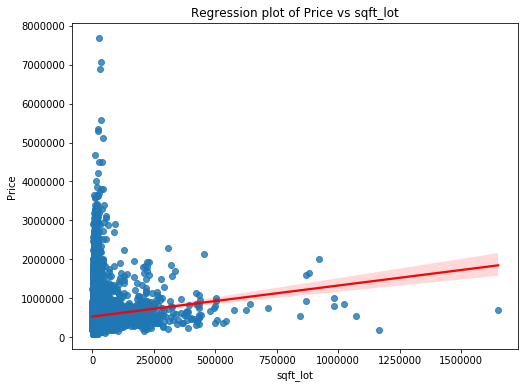

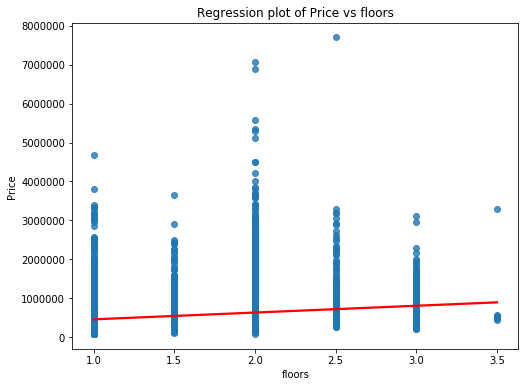

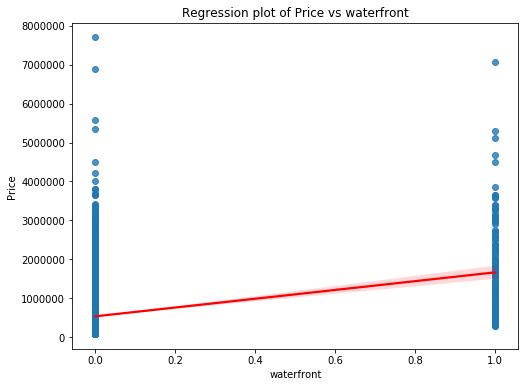

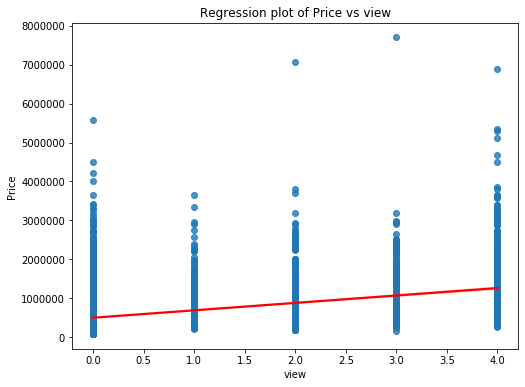

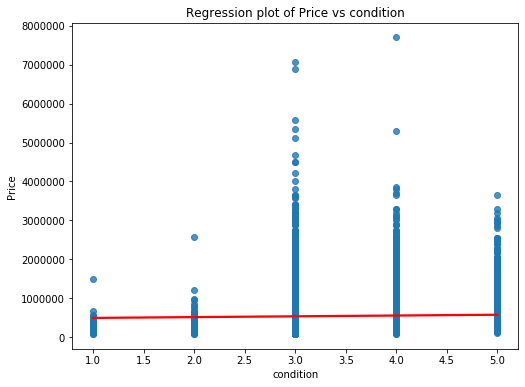

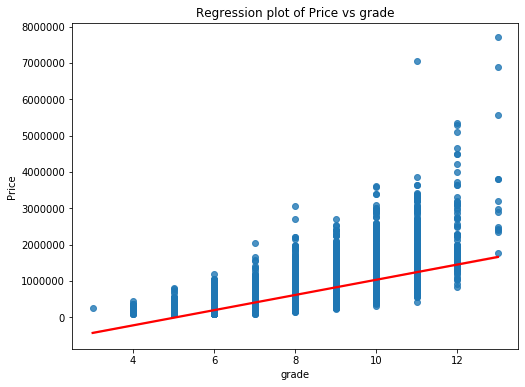

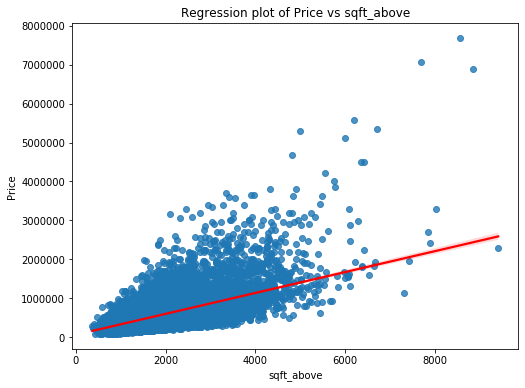

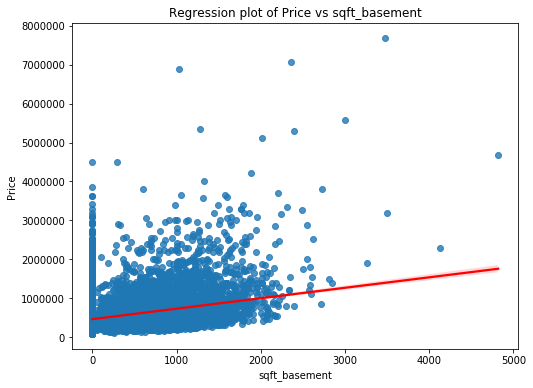

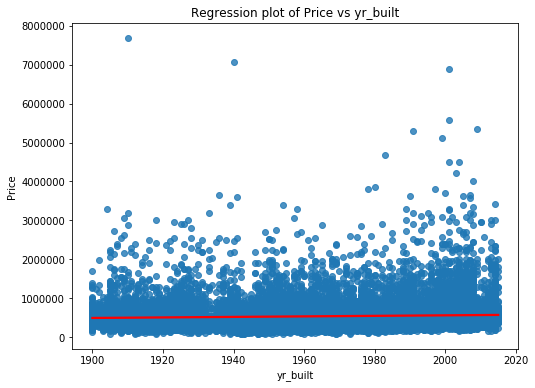

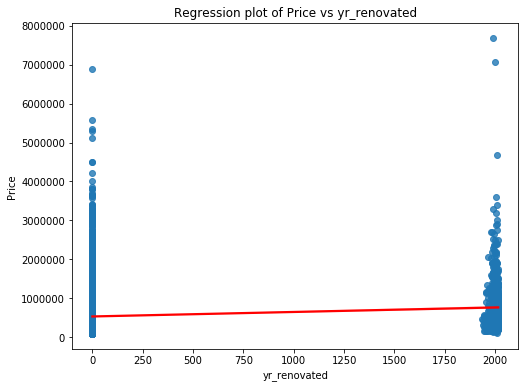

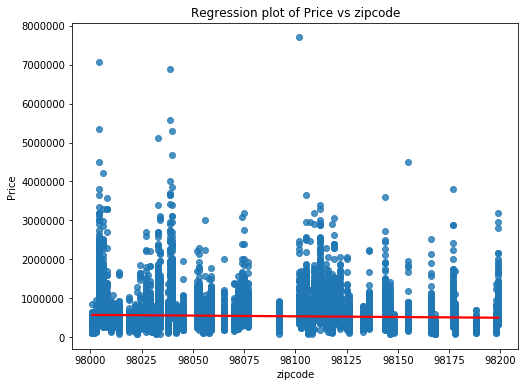

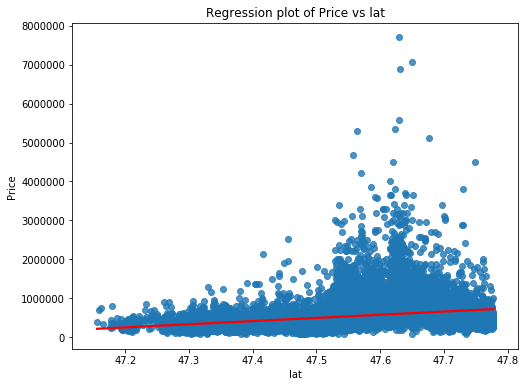

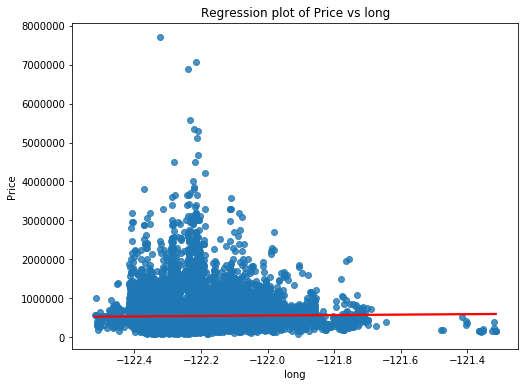

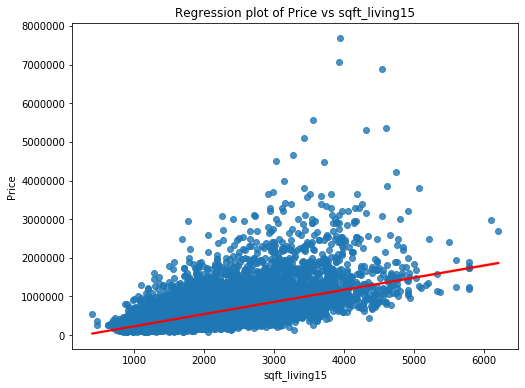

In [32]:
df_numerical = df.select_dtypes(include=['int64','float64'])

for column in df_numerical.columns[1:18]:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=column, y='price', data=df, line_kws={'color': 'red'})
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.title(f'Regression plot of Price vs {column}')
    plt.show()


In [33]:
outliers_dict = {}

for col in df_numerical.columns:

    Q1 = df_numerical[col].quantile(0.25)
    Q3 = df_numerical[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df_numerical[(df_numerical[col] < (Q1 - 1.5 * IQR)) | (df_numerical[col] > (Q3 + 1.5 * IQR))][col]
    
    outlier_percentage = round((len(outliers) / len(df_numerical[col]) * 100),2)
    
    outliers_dict[col] = {'outliers_count': len(outliers), 'outliers_percentage': outlier_percentage}
    outliers_df = pd.DataFrame.from_dict(outliers_dict, orient='index')

outliers_df

,outliers_count,outliers_percentage
id,0,0.00
bedrooms,530,2.45
bathrooms,561,2.60
sqft_living,571,2.64
sqft_lot,2419,11.20
floors,0,0.00
waterfront,163,0.75
view,2122,9.83
condition,29,0.13
grade,1905,8.82


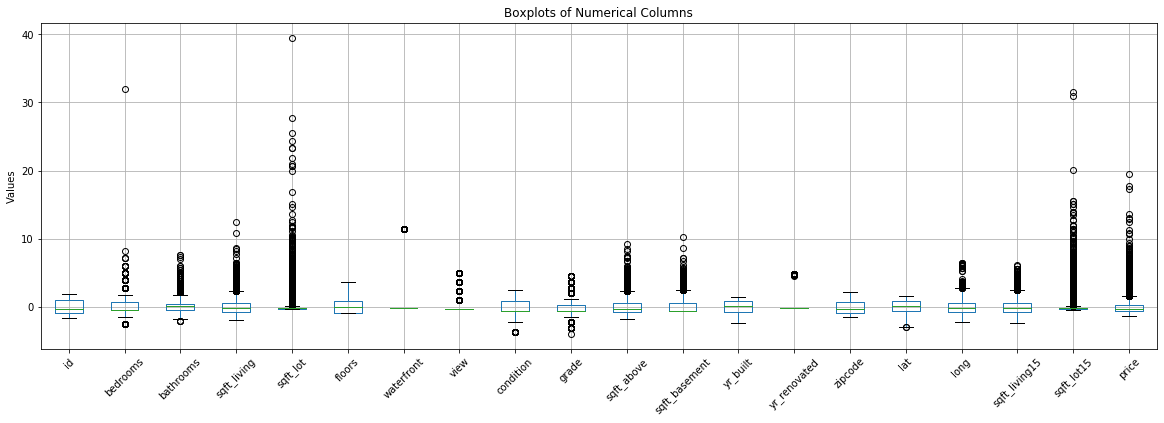

In [34]:
scaler = StandardScaler()


numeric_df_normalized = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)


numeric_df_normalized.boxplot(figsize=(20, 6))
plt.title("Boxplots of Numerical Columns")
plt.ylabel("Values")
plt.xticks(rotation=45)

plt.show()

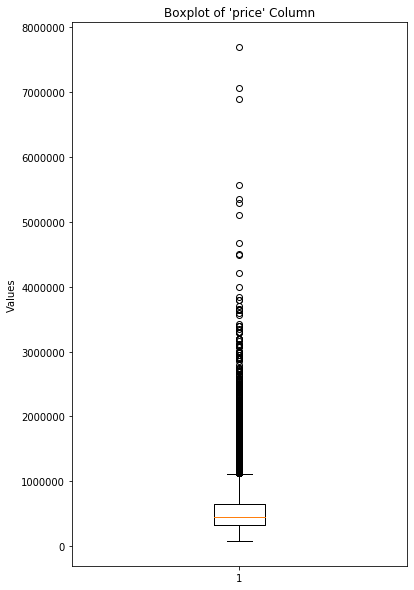

In [35]:
plt.figure(figsize=(6, 10))
plt.boxplot(df['price'])
plt.title("Boxplot of 'price' Column")
plt.ylabel("Values")
plt.show()


## Analysis of Categorical Features relative to Price

In [36]:
df_new = df.copy()
cols_to_convert = ['waterfront', 'condition', 'grade']

for col in cols_to_convert:
    df_new[col] = df_new[col].astype(str)
    

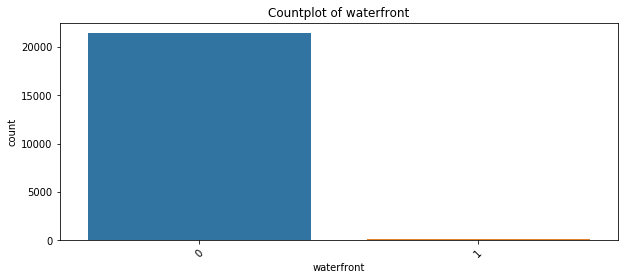

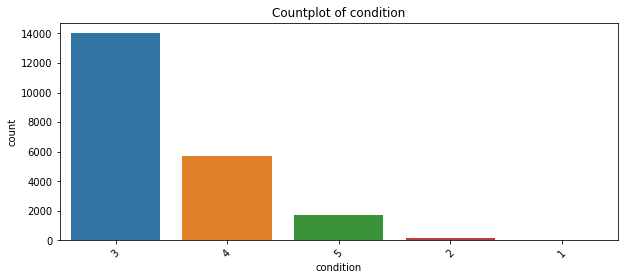

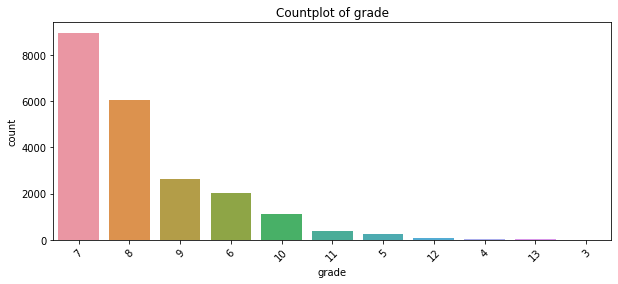

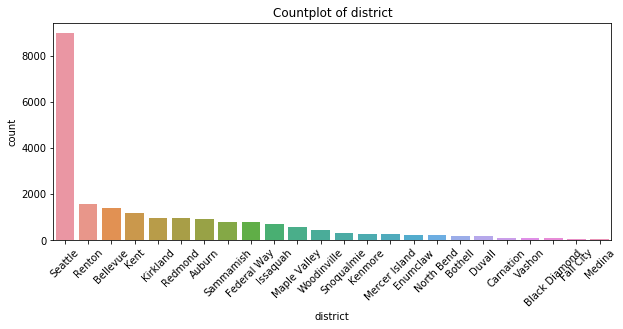

In [37]:
for column in df_new.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 4)) 
    # Calculate the order of categories based on their counts and use it for the plot
    order = df_new[column].value_counts().index
    sns.countplot(x=column, data=df_new, order=order)
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=45) 
    plt.show()


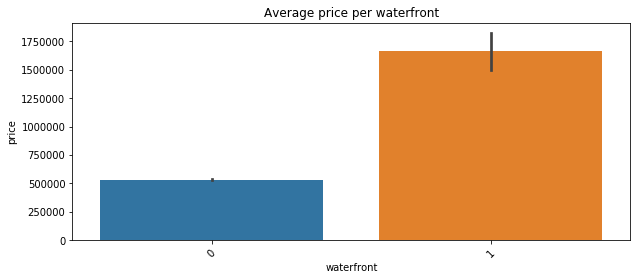

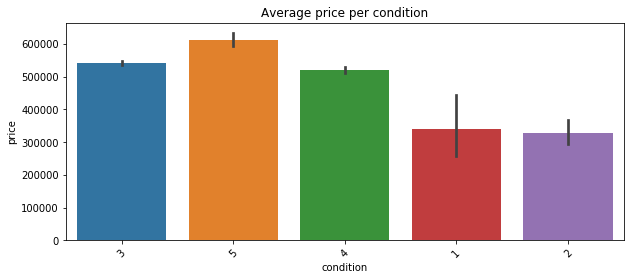

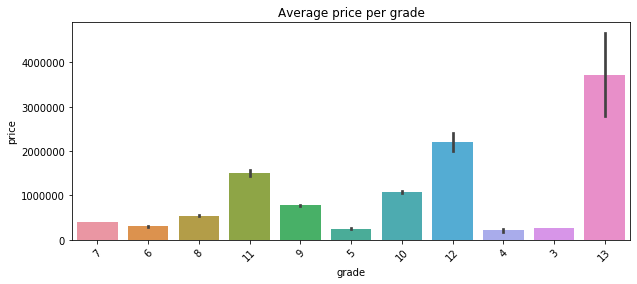

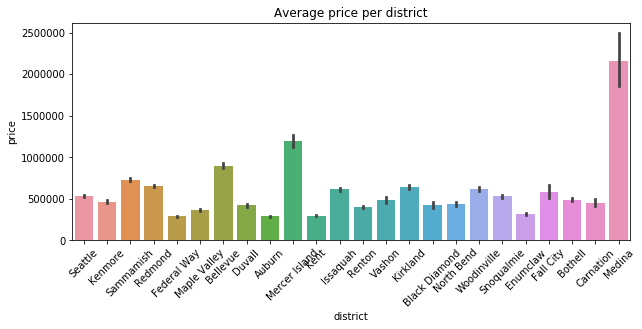

In [38]:
for column in df_new.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 4)) 
    sns.barplot(x=column, y='price', data=df_new)
    plt.title(f'Average price per {column}')
    plt.xticks(rotation=45)
    plt.show()

# Baseline models

In [39]:
df_modelling = df.copy()
df_modelling.drop(columns=['id','date'], axis=1, inplace=True)


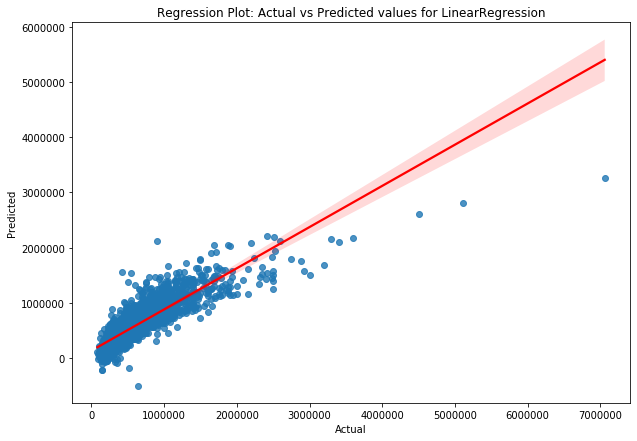

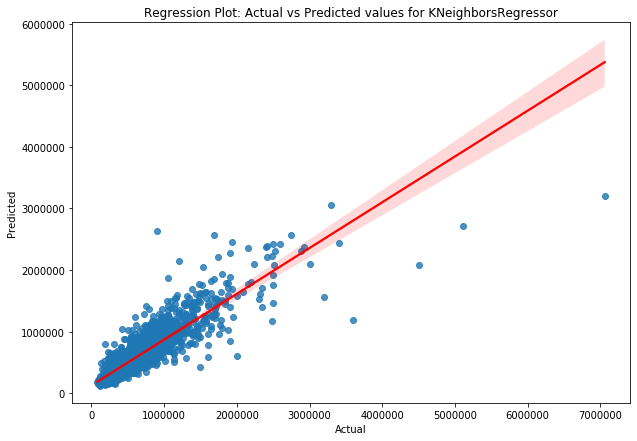

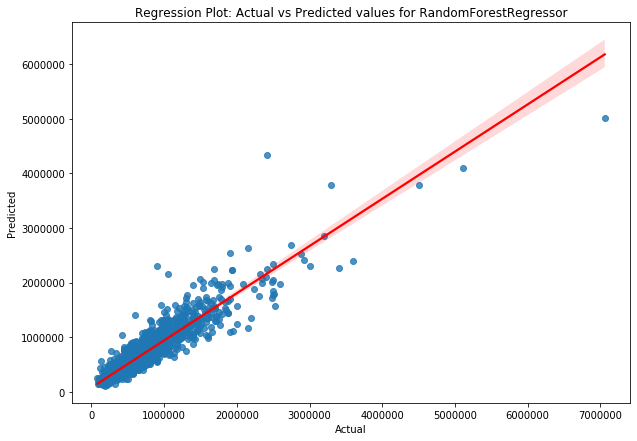

,Model,r2,mse,mae
0,LinearRegression,0.739571,3.391211e+10,112855.940938
1,KNeighborsRegressor,0.790733,2.724994e+10,85254.329491
2,RandomForestRegressor,0.880928,1.550506e+10,68079.933080


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Encoding
df_modelling = pd.get_dummies(df_modelling)



# X, Y split
X = df_modelling.drop(columns=['price'])
Y = df_modelling['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

#Model fitting

models = [LinearRegression(), KNeighborsRegressor(), RandomForestRegressor()]

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame(columns=["Model", "r2", "mse", "mae"])

for model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    
    mse = mean_squared_error(Y_test, predictions)
    mae = mean_absolute_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)

    metrics_dict = {"Model": str(type(model).__name__), "r2": r2, "mse": mse, "mae": mae}


    metrics_df = metrics_df.append(metrics_dict, ignore_index=True)

    plt.figure(figsize=(10, 7))
    sns.regplot(x=Y_test, y=predictions, line_kws={"color": "red"})
    
    plt.title(f'Regression Plot: Actual vs Predicted values for {str(type(model).__name__)}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

    
metrics_df




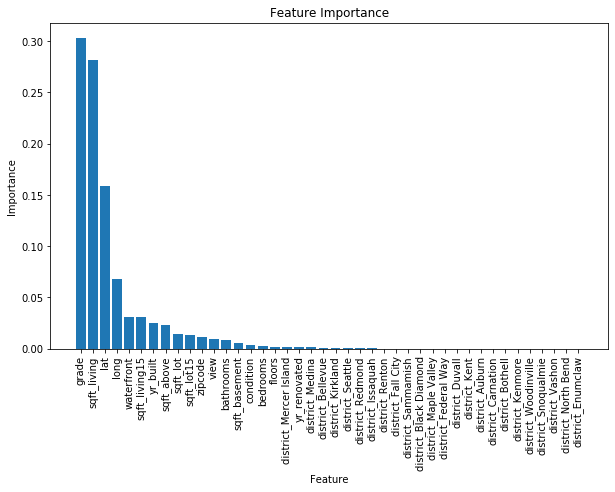

In [41]:

# If you want to calculate feature importances, use a model that provides this info, like RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

# Calculate the feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()


### Outliers remove

In [42]:
# Calculate the IQR of the 'price' column
Q1 = df_modelling['price'].quantile(0.25)
Q3 = df_modelling['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove the outliers
df_modelling = df_modelling[(df_modelling['price'] >= lower_bound) & (df_modelling['price'] <= upper_bound)]


### Feature Selection

In [43]:
# Feature Slelection using coef
df_modelling.corr()['price'].sort_values(ascending=False)

price                     1.000000
grade                     0.630980
sqft_living               0.621362
sqft_living15             0.562024
sqft_above                0.529931
bathrooms                 0.454959
lat                       0.431026
bedrooms                  0.294144
floors                    0.273360
view                      0.237079
sqft_basement             0.233846
district_Bellevue         0.230888
district_Sammamish        0.194474
district_Redmond          0.162670
district_Mercer Island    0.159191
district_Issaquah         0.093567
sqft_lot                  0.093554
yr_renovated              0.084187
sqft_lot15                0.082413
district_Woodinville      0.080877
district_Kirkland         0.075195
long                      0.072262
yr_built                  0.061264
waterfront                0.051724
condition                 0.037204
district_Medina           0.034978
district_Snoqualmie       0.023449
district_Seattle          0.008644
district_Bothell    

In [44]:
# Checking Multi-Colinearity between features:
correlations_matrix = df_modelling.corr()
correlations_matrix = correlations_matrix[((correlations_matrix > .8) | (correlations_matrix < -.8))]
correlations_matrix.fillna(0)[:20]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,district_Medina,district_Mercer Island,district_North Bend,district_Redmond,district_Renton,district_Sammamish,district_Seattle,district_Snoqualmie,district_Vashon,district_Woodinville
bedrooms,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
bathrooms,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
sqft_living,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.853404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
sqft_lot,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
floors,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
waterfront,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
view,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
condition,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
grade,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
sqft_above,0.0,0.0,0.853404,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0


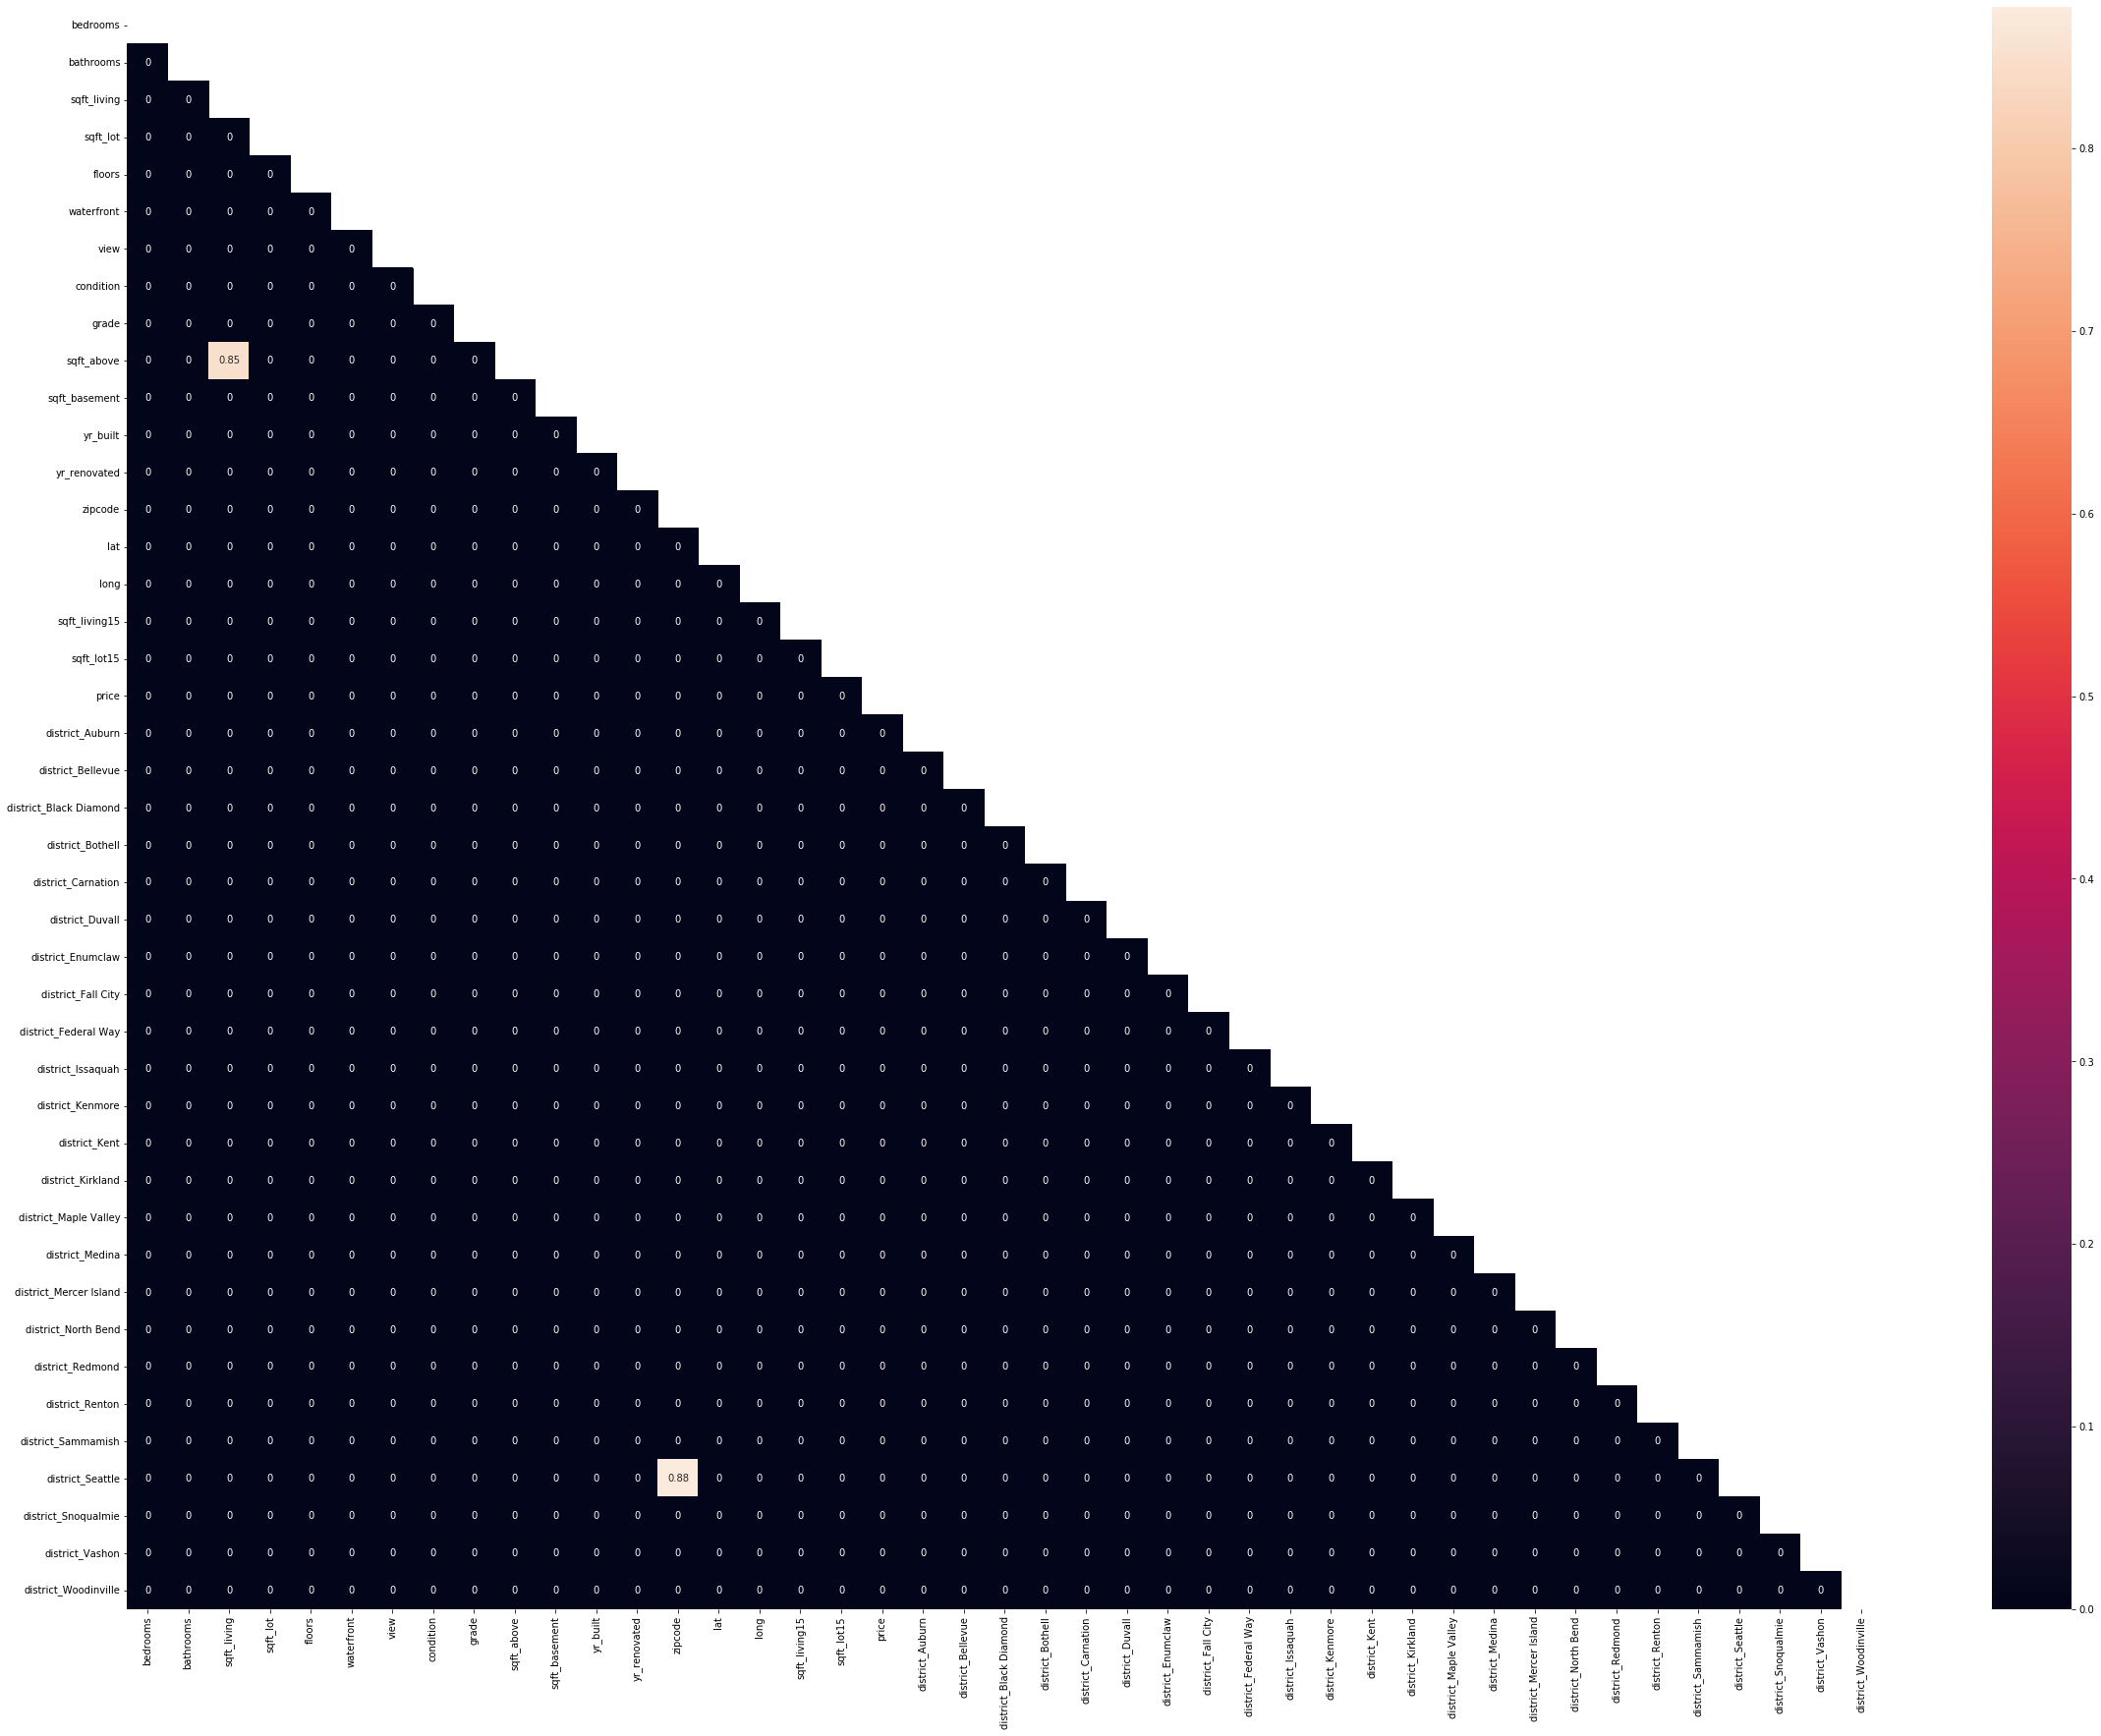

In [45]:
correlations_matrix = correlations_matrix.fillna(0)
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(40, 30))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [46]:
df_modelling = df_modelling.drop(['sqft_above', 'zipcode'],axis=1)

# Retraining the model

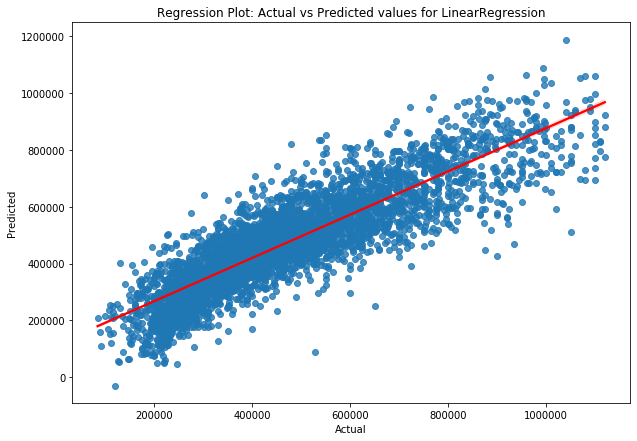

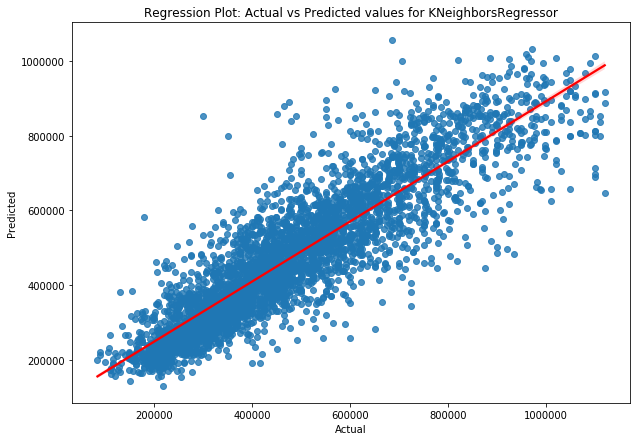

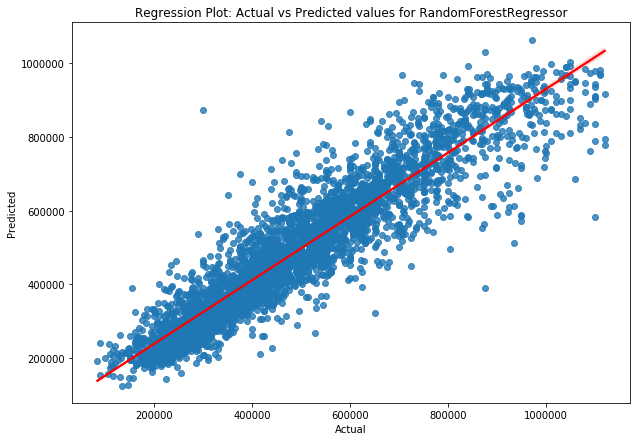

,Model,r2,mse,mae
0,LinearRegression,0.757659,1.011300e+10,76018.684308
1,KNeighborsRegressor,0.788454,8.827915e+09,66013.602202
2,RandomForestRegressor,0.863023,5.716093e+09,52067.424963


In [47]:

# X, Y split
X = df_modelling.drop(columns=['price'])
Y = df_modelling['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

#Model fitting

models = [LinearRegression(), KNeighborsRegressor(), RandomForestRegressor()]

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame(columns=["Model", "r2", "mse", "mae"])

for model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    
    mse = mean_squared_error(Y_test, predictions)
    mae = mean_absolute_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)

    metrics_dict = {"Model": str(type(model).__name__), "r2": r2, "mse": mse, "mae": mae}


    metrics_df = metrics_df.append(metrics_dict, ignore_index=True)

    plt.figure(figsize=(10, 7))
    sns.regplot(x=Y_test, y=predictions, line_kws={"color": "red"})
    
    plt.title(f'Regression Plot: Actual vs Predicted values for {str(type(model).__name__)}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

    
metrics_df

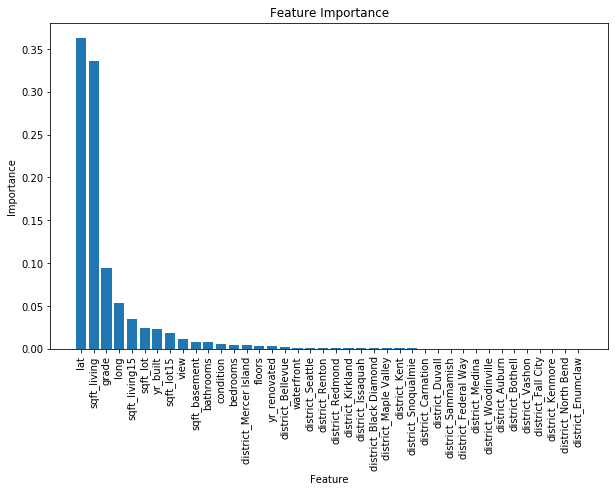

In [48]:
# X, Y split
X = df_modelling.drop(columns=['price'])
Y = df_modelling['price']

# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 


# If you want to calculate feature importances, use a model that provides this info, like RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

# Calculate the feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()


# Conclusion

- Outliers removeal, feature sleection according to the coorelation does not improve the baseline modesl.
- It turns out Forest Decision Tree reveal the best predicting power in price prediction
- The most important features that influce to the property price is Grade, Living size, location and waterfront